# Курсовой проект для курса "Python для Data Science"

Материалы к проекту (файлы):\
train.csv\
test.csv

## Задание:
Используя данные из train.csv, построить модель для предсказания цен на недвижимость (квартиры).\
С помощью полученной модели предсказать цены для квартир из файла test.csv.\

Целевая переменная:
Price

Метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)


### Описание параметров

**'Id'** - id квартиры\
**'DistrictId'** - id района\
**'Rooms'** - количество комнат\
**'Square'** - площадь квартиры\
**'LifeSquare'** - площадь жилой зоны\
**'KitchenSquare'** - площадь кухни\
**'Floor'** - этаж\
**'HouseFloor'** - количество этажей в доме\
**'HouseYear'** - год постройки дома\
**Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности\
**Social_1, Social_2, Social_3** - социальные показатели местности\
**Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья\
**Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров


**'Price'**- стоимость квартиры

In [86]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [87]:
apartments = pd.read_csv('D:/Komarov/AnalystBigData/1_3 Python DS/Kurs_project_task/train.csv')

In [88]:
apartments.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


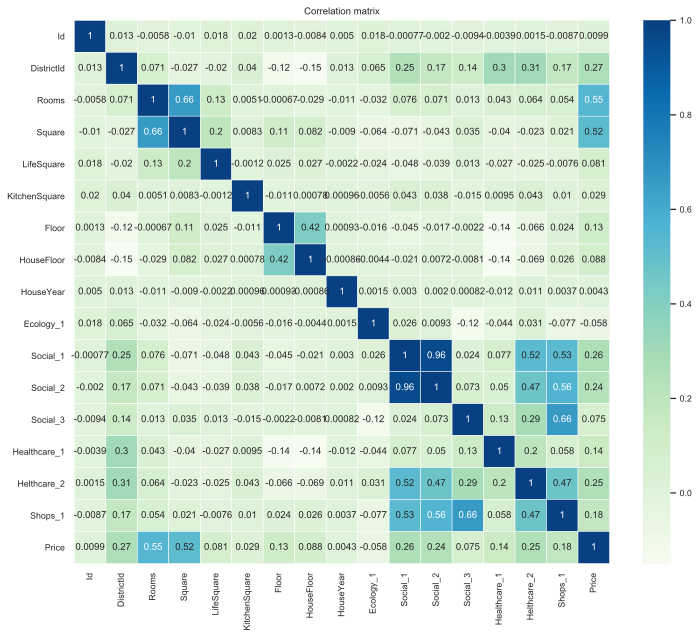

In [89]:
plt.figure(figsize = (12,10))

sns.set(font_scale=0.8)
sns.heatmap(apartments.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

## Предобработка данных train.csv

In [90]:
apartments.set_index('Id', inplace = True)
apartments.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [91]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [92]:
apartments.rename(columns = {'Helthcare_2': 'Healthcare_2'}, inplace = True)

#### Обработка 'Rooms'

In [93]:
apartments['Rooms'].unique()

array([ 2.,  3.,  1.,  4., 10.,  0.,  5., 19.,  6.])

In [94]:
apartments['Rooms']=apartments['Rooms'].astype(np.int64)

#### Обработка 'HouseYear'

In [95]:
apartments['HouseYear'].unique()

array([    1969,     1978,     1968,     1977,     1976,     2011,
           1960,     2014,     1973,     1959,     1999,     1980,
           1979,     1983,     2001,     2012,     2002,     1996,
           1964,     2018,     1972,     1965,     1984,     1961,
           1971,     1963,     2017,     1970,     1981,     2003,
           2016,     1991,     1975,     2006,     2009,     1985,
           1974,     1994,     2000,     1987,     1998,     2005,
           1990,     1982,     1997,     2015,     2008,     2010,
           2004,     2007,     1967,     1957,     1962,     1993,
           1966,     1955,     1937,     1992,     1954,     1995,
           2019,     1948,     1986,     2013,     1989,     1958,
           1938,     1956,     1988,     2020,     1951,     1952,
           1935,     1914,     1932,     1950,     1917,     1918,
           1940, 20052011,     1942,     1939,     1934,     1931,
           1919,     1912,     1953,     1936,     1947,     1

In [96]:
# Некорректные значения HouseYear
apartments.loc[apartments['HouseYear'] > 2020, :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
10814,109,1,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
11607,147,2,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [97]:
# Заменять будем медианой HouseYear по соотвествующим районам
mean_year = apartments.groupby('DistrictId')['HouseYear'].median()
mean_year = mean_year.loc[apartments.loc[apartments['HouseYear'] > 2020, 'DistrictId'].values]
mean_year

DistrictId
109    1985.0
147    1968.0
Name: HouseYear, dtype: float64

In [98]:
apartments.loc[apartments['HouseYear'] > 2020, 'HouseYear'] = mean_year.values
# Проверка
apartments.loc[apartments['HouseYear'] > 2020, :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,


#### Обработка 'Floor' and 'HouseFloor'

In [99]:
apartments['HouseFloor'].unique()

array([  9.,  12.,  17.,   5.,   0.,   8.,   4.,  14.,  25.,   1.,  22.,
        16.,  15.,   3.,  10.,  11.,   7.,  24.,  28.,  19.,  20.,  18.,
        23.,   2.,  32.,  40.,  27.,  21.,  13.,  45.,  30.,   6.,  37.,
        48.,  47.,  44.,  39.,  36.,  29.,  99.,  38., 117.,  26.,  31.])

In [100]:
apartments['Floor'].unique()

array([ 7,  8, 11,  5,  3, 14,  9, 13,  1,  6,  4, 16, 12, 15, 19,  2, 17,
       20, 10, 18, 26, 23, 22, 24, 21, 25, 32, 28, 27, 42, 31, 37, 33],
      dtype=int64)

In [101]:
# Квартиры, где этаж, на котором находится квартира, больше количества этажей в доме

apartments.loc[apartments['Floor']>apartments['HouseFloor'], :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11993,74,2,80.312926,NaN,0.0,14,0.0,1977.0,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
10953,27,1,53.769097,52.408027,1.0,5,4.0,1977.0,0.072158,B,B,2,629,1,NaN,0,0,A,140647.565937
2119,27,2,49.360648,31.993964,5.0,6,5.0,1983.0,0.051815,B,B,5,1227,0,NaN,0,0,B,117000.381287
11935,27,2,64.711835,NaN,1.0,15,1.0,1977.0,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
6641,54,3,118.907612,NaN,0.0,2,0.0,1977.0,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2237,52,3,64.074977,47.633428,6.0,11,9.0,1983.0,0.371149,B,B,34,7065,1,750.0,2,5,B,226434.880156
16159,27,1,38.968338,NaN,1.0,10,1.0,1977.0,0.211401,B,B,9,1892,0,NaN,0,1,B,95529.569405
4145,96,3,90.055233,47.860231,11.0,26,24.0,2005.0,0.041116,B,B,53,14892,4,NaN,1,4,B,441108.911237


In [102]:
#Меняем значения местами 'HouseFloor и 'Floor'

floor = apartments.loc[apartments['Floor']>apartments['HouseFloor'], 'Floor']
apartments.loc[floor.keys(), 'Floor'] = apartments.loc[apartments['Floor']>apartments['HouseFloor'], 'HouseFloor']
apartments.loc[floor.keys(), 'HouseFloor'] = floor
apartments.loc[floor.keys()]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11993,74,2,80.312926,NaN,0.0,0.0,14.0,1977.0,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
10953,27,1,53.769097,52.408027,1.0,4.0,5.0,1977.0,0.072158,B,B,2,629,1,NaN,0,0,A,140647.565937
2119,27,2,49.360648,31.993964,5.0,5.0,6.0,1983.0,0.051815,B,B,5,1227,0,NaN,0,0,B,117000.381287
11935,27,2,64.711835,NaN,1.0,1.0,15.0,1977.0,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
6641,54,3,118.907612,NaN,0.0,0.0,2.0,1977.0,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2237,52,3,64.074977,47.633428,6.0,9.0,11.0,1983.0,0.371149,B,B,34,7065,1,750.0,2,5,B,226434.880156
16159,27,1,38.968338,NaN,1.0,1.0,10.0,1977.0,0.211401,B,B,9,1892,0,NaN,0,1,B,95529.569405
4145,96,3,90.055233,47.860231,11.0,24.0,26.0,2005.0,0.041116,B,B,53,14892,4,NaN,1,4,B,441108.911237


In [103]:
# Проверка
apartments.loc[apartments['Floor']>apartments['HouseFloor'], :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,


In [104]:
apartments['HouseFloor'] = apartments['HouseFloor'].astype(np.int64)

In [105]:
apartments['Floor'] = apartments['Floor'].astype(np.int64)

#### Обработка 'Square' and 'LifeSquare' and 'KitchenSquare'

In [106]:
# Присутствуют наблюдения, где площадь квартиры меньше жилой площади
apartments.loc[apartments['Square'] < apartments['LifeSquare'], {'Square', 'LifeSquare'}]

,Square,LifeSquare
Id,,
8054,42.530043,43.967759
10521,104.211396,106.340403
2301,61.400054,65.224603
8753,85.952306,89.803753
9870,51.831473,53.491301
...,...,...
41,59.015896,59.439082
12918,51.440463,53.134243
2737,123.430072,125.806981


In [107]:
#меняем местами значения данные наблюдения
def swap(row):
    if row.Square < row.LifeSquare:
        return [row.LifeSquare, row.Square]
    else: 
        return [row.Square, row.LifeSquare]
    
x = apartments.apply(swap, axis=1, result_type='expand')

apartments['Square'] = x[0]
apartments['LifeSquare'] = x[1]

In [108]:
# Проверка
apartments.loc[apartments['Square'] < apartments['LifeSquare'], {'Square', 'LifeSquare'}]

,Square,LifeSquare
Id,,


In [109]:
# Находим пустые наблюдения
apartments.loc[apartments['LifeSquare'].isnull(), ['Square', 'LifeSquare']]

,Square,LifeSquare
Id,,
11993,80.312926,NaN
5172,64.511437,NaN
11935,64.711835,NaN
6641,118.907612,NaN
5073,82.667915,NaN
...,...,...
16159,38.968338,NaN
2996,64.994245,NaN
15623,55.620092,NaN


In [110]:
# Заполняем пустые наблюдения жилой площади след образом: 
# - находим средние значения (groupby) Square and LifeSquare по районам
# - нахоим отношение Square к LifeSquare по районам 

ag = apartments.groupby('DistrictId')['Square', 'LifeSquare'].mean()
ag['koef'] = ag['Square']/ag['LifeSquare']
ag

C:\Progs\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,Square,LifeSquare,koef
DistrictId,,,
0,54.549887,32.425354,1.682322
1,59.441571,45.223400,1.314399
2,53.900636,32.677547,1.649470
3,50.138363,30.640976,1.636317
4,66.822950,44.107076,1.515017
...,...,...,...
202,68.245487,44.687149,1.527184
205,43.226985,18.663548,2.316118
207,76.780960,55.770043,1.376742


In [111]:
# Для пустых наблюдений рассчитываем LifeSquare исходя из среднего отношения Square к LifeSquare по району
# С использованием функции

def calc_lsquare(lsq, sq, ag):
    if np.isnan(lsq): 
        x = sq/ag
        return x
    else:
        return lsq

new_lsq = apartments.apply(lambda x: calc_lsquare(x['LifeSquare'], x['Square'], ag.loc[x['DistrictId'], 'koef']), axis=1, result_type='expand')

apartments['LifeSquare'] = new_lsq
apartments[{'Square', 'LifeSquare'}]

,Square,LifeSquare
Id,,
14038,47.981561,29.442751
15053,65.683640,40.049543
4765,44.947953,29.197612
5809,53.352981,52.731512
10783,39.649192,23.776169
...,...,...
77,50.401785,30.476203
6159,41.521546,20.539216
5123,47.939008,28.596257


In [112]:
# Проверка

apartments.loc[apartments['LifeSquare'].isnull(), ['Square', 'LifeSquare']]

,Square,LifeSquare
Id,,


In [113]:
# Наблюдения, где площадь кухни больше площади кавртиры
apartments['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [114]:
apartments.loc[apartments['Square'] < apartments['KitchenSquare'], :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14656,62,1,47.100719,46.447960,2014.0,1,4,2014.0,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
13703,42,1,38.071692,19.723548,73.0,9,10,2006.0,0.158249,B,B,21,5731,0,NaN,1,0,B,160488.033165
6569,27,1,38.220258,18.716856,84.0,4,17,2018.0,0.011654,B,B,4,915,0,NaN,0,0,B,99079.960518
14679,81,1,32.276663,19.278394,1970.0,1,6,1977.0,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


In [115]:
# Заполним площадь кухни средней площадью кухонь по району
# Замену значений будем производить с помощью создания новоого ДФ
 
mean_ks = apartments.groupby('DistrictId')['KitchenSquare'].mean()
mean_ks = mean_ks.loc[apartments.loc[apartments['Square'] < apartments['KitchenSquare'], 'DistrictId'].values]
mean_ks

DistrictId
62     12.396761
42     10.833333
27      4.896592
81    116.555556
Name: KitchenSquare, dtype: float64

In [116]:
apartments.loc[apartments['Square'] < apartments['KitchenSquare'], 'KitchenSquare'] = mean_ks.values

In [117]:
#Проверка
apartments.loc[apartments['Square'] < apartments['KitchenSquare'], :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14679,81,1,32.276663,19.278394,116.555556,1,6,1977.0,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


In [118]:
# Присвоение медианы и повторная проверка 
apartments.loc[apartments['Square'] < apartments['KitchenSquare'], 'KitchenSquare'] = apartments['KitchenSquare'].median()
apartments.loc[apartments['Square'] < apartments['KitchenSquare'], :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,


#### Обрабатка Ecology_2

In [119]:
apartments['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [120]:
ec2_map = {'A': 0, 'B':1}
apartments['Ecology_2']= apartments['Ecology_2'].map(ec2_map)

#### Обрабатка Ecology_3 

In [121]:
apartments['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [122]:
apartments['Ecology_3']= apartments['Ecology_3'].map(ec2_map)

#### Обрабатка Shops_2 

In [123]:
apartments['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [124]:
apartments['Shops_2']= apartments['Shops_2'].map(ec2_map)

#### Обрабатка Healthcare_1

In [125]:
# Восстановление данных осуществляем с помощью обучения с учителем - RandomForestClassifier
# Создаем ДФ с ненулевыми наблюдениями Healthcare_1 и разделяем на признаки и цель
hc = apartments.loc[apartments['Healthcare_1'].notnull(), :]
hc = hc.iloc[:, :-1]
X_hc = hc.drop('Healthcare_1', axis=1)
y_hc = hc['Healthcare_1'] 

In [126]:
# Создаем тестовый ДФ с нулевыми наблюдениями Healthcare_1
hc2 = apartments.loc[apartments['Healthcare_1'].isnull(), :]
hc2 = hc2.iloc[:, :-1]
Xhc_test = hc2.drop('Healthcare_1', axis=1)

In [127]:
from sklearn.model_selection import train_test_split
Xhc_train, Xhc_valid, yhc_train, yhc_valid = train_test_split(X_hc, y_hc, test_size=0.2, random_state=77)

In [128]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, max_features= 13, max_depth= 30)
rfc.fit(Xhc_train, yhc_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features=13,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [129]:
yhc_valid_pred = rfc.predict(Xhc_valid)

from sklearn.metrics import accuracy_score
accuracy_score(yhc_valid, yhc_valid_pred)

1.0

In [130]:
yhc_train_pred = rfc.predict(Xhc_train)
accuracy_score(yhc_train, yhc_train_pred)

1.0

In [131]:
yhc_test_pred = rfc.predict(Xhc_test)
apartments.loc[apartments['Healthcare_1'].isnull(), 'Healthcare_1'] = yhc_test_pred

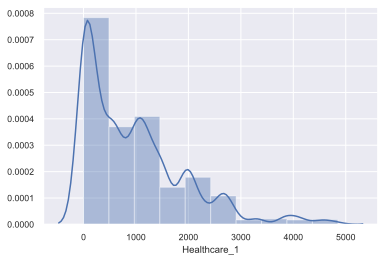

In [132]:
sns.distplot(apartments['Healthcare_1'], bins=10)

In [133]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  int64  
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  int64  
 7   HouseYear      10000 non-null  float64
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  int64  
 10  Ecology_3      10000 non-null  int64  
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   10000 non-null  float64
 15  Healthcare_2   10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  int64  
 18  Pri

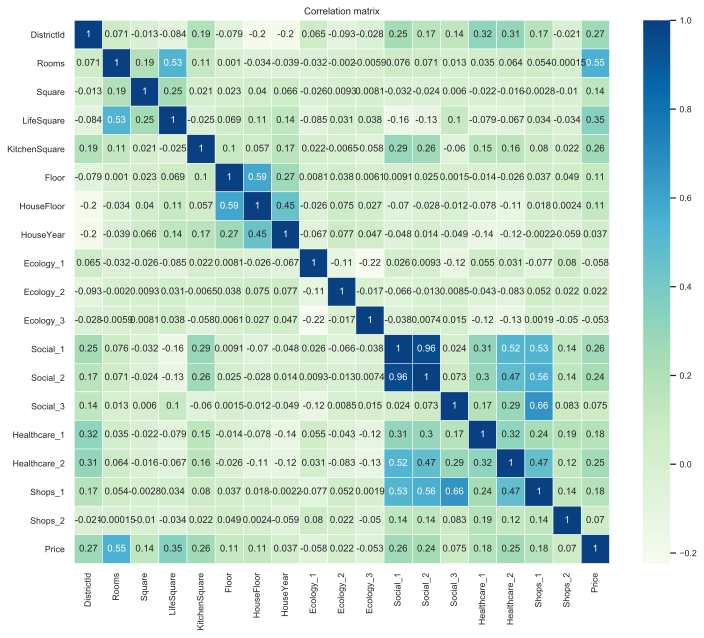

In [134]:
plt.figure(figsize = (12,10))

sns.set(font_scale=0.8)
sns.heatmap(apartments.corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [135]:
# apartments.to_csv('apart_train_prepared.csv', encoding='utf-8')

## Предобработка данных test.csv

In [136]:
apart_test = pd.read_csv('D:/Komarov/AnalystBigData/1_3 Python DS/Kurs_project_task/test.csv')

apart_test.set_index('Id', inplace = True)

apart_test.rename(columns = {'Helthcare_2': 'Healthcare_2'}, inplace = True)

#### Обработка 'Rooms'

In [137]:
apart_test['Rooms']=apart_test['Rooms'].astype(np.int64)

#### Обработка 'Floor' and 'HouseFloor'

In [138]:
# Квартиры, где этаж, на котором находится квартира, больше количества этажей в доме

#Меняем значения местами 'HouseFloor и 'Floor'

floor = apart_test.loc[apart_test['Floor']>apart_test['HouseFloor'], 'Floor']
apart_test.loc[floor.keys(), 'Floor'] = apart_test.loc[apart_test['Floor']>apart_test['HouseFloor'], 'HouseFloor']
apart_test.loc[floor.keys(), 'HouseFloor'] = floor

apart_test['HouseFloor'] = apart_test['HouseFloor'].astype(np.int64)

apart_test['Floor'] = apart_test['Floor'].astype(np.int64)

#### Обработка 'Square' and 'LifeSquare' and 'KitchenSquare'

In [139]:
# Присутствуют наблюдения, где площадь квартиры меньше жилой площади

#меняем местами значения данных наблюдений
x = apart_test.apply(swap, axis=1, result_type='expand')

apart_test['Square'] = x[0]
apart_test['LifeSquare'] = x[1]

In [140]:
# Находим пустые наблюдения
apart_test.loc[apart_test['LifeSquare'].isnull(), ['Square', 'LifeSquare', 'DistrictId']].sort_values(by='DistrictId')

,Square,LifeSquare,DistrictId
Id,,,
10670,65.891518,NaN,1
5705,62.114155,NaN,1
8684,54.763380,NaN,1
8809,63.076673,NaN,1
2538,53.113037,NaN,1
...,...,...,...
14557,61.917994,NaN,148
13900,48.530248,NaN,169
6317,56.214048,NaN,169


In [141]:
# Заполняем пустые наблюдения жилой площади след образом: 
# - находим средние значения Square and LifeSquare по районам
# - нахоим отношение Square к LifeSquare по районам 

ag = apart_test.groupby('DistrictId')['Square', 'LifeSquare'].mean()
ag['koef'] = ag['Square']/ag['LifeSquare']

# Для пустых наблюдений рассчитываем LifeSquare исходя из среднего отношения Square к LifeSquare по району
# С использованием функции
new_lsq = apart_test.apply(lambda x: calc_lsquare(x['LifeSquare'], x['Square'], ag.loc[x['DistrictId'], 'koef']), axis=1, result_type='expand')

apart_test['LifeSquare'] = new_lsq

C:\Progs\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


In [142]:
# Проверка

apart_test.loc[apart_test['LifeSquare'].isnull(), ['Square', 'LifeSquare']]

,Square,LifeSquare
Id,,


In [143]:
apart_test.loc[apart_test['Square'] < apart_test['KitchenSquare'], :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
14594,11,2,42.795304,24.223770,620.0,11,14,1972,0.038693,B,B,28,6533,1,1015.0,2,5,B
10662,29,1,25.956829,17.251768,33.0,5,5,1973,0.069660,B,B,31,6119,4,NaN,1,2,B
3194,29,2,43.926987,31.028707,44.0,5,6,1964,0.086885,B,B,10,2277,2,1547.0,0,0,B
12640,6,2,54.629142,31.486308,97.0,4,17,2015,0.243205,B,B,5,1564,0,540.0,0,0,B


In [144]:
# Заполним площадь кухни средней площадью кухонь по району
# Замену значений будем производить с помощью создания новоого ДФ
 
mean_ks = apart_test.groupby('DistrictId')['KitchenSquare'].mean()
mean_ks = mean_ks.loc[apart_test.loc[apart_test['Square'] < apart_test['KitchenSquare'], 'DistrictId'].values]

apart_test.loc[apart_test['Square'] < apart_test['KitchenSquare'], 'KitchenSquare'] = mean_ks.values

# проверка 
apart_test.loc[apart_test['Square'] < apart_test['KitchenSquare'], :]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,


#### Обрабатка Ecology_2

In [145]:
ec2_map = {'A': 0, 'B':1}
apart_test['Ecology_2']= apart_test['Ecology_2'].map(ec2_map)

#### Обрабатка Ecology_3 

In [146]:
apart_test['Ecology_3']= apart_test['Ecology_3'].map(ec2_map)

#### Обрабатка Shops_2 

In [147]:
apart_test['Shops_2'].value_counts()

B    4588
A     412
Name: Shops_2, dtype: int64

In [148]:
apart_test['Shops_2']= apart_test['Shops_2'].map(ec2_map)

#### Обрабатка Healthcare_1

In [149]:
# Восстановление данных осуществляем с помощью rfc

# Создаем тестовый ДФ с нулевыми наблюдениями Healthcare_1
hc2 = apart_test.loc[apart_test['Healthcare_1'].isnull(), :]
Xhc_test = hc2.drop('Healthcare_1', axis=1)

In [150]:
yhc_test_pred = rfc.predict(Xhc_test)
apart_test.loc[apart_test['Healthcare_1'].isnull(), 'Healthcare_1'] = yhc_test_pred

In [151]:
# apart_test.to_csv('apart_test_prepared.csv', encoding='utf-8')

In [152]:
apart_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   int64  
 2   Square         5000 non-null   float64
 3   LifeSquare     5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   int64  
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   int64  
 10  Ecology_3      5000 non-null   int64  
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   5000 non-null   float64
 15  Healthcare_2   5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   int64  
dtypes: fl

## Предсказание цен на недвижимость

### Обучение модели (train) - метод Случайный лес

In [153]:
# apart_train = pd.read_csv('apart_train_prepared.csv')
# apart_train.set_index('Id', inplace = True)
apart_train = apartments.copy()
apart_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2,47.981561,29.442751,6.0,7,9,1969.0,0.089040,1,1,33,7976,5,990.0,0,11,1,184966.930730
15053,41,3,65.683640,40.049543,8.0,7,9,1978.0,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
4765,53,2,44.947953,29.197612,0.0,8,12,1968.0,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524
5809,58,2,53.352981,52.731512,9.0,8,17,1977.0,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
10783,99,1,39.649192,23.776169,7.0,11,12,1976.0,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644


In [154]:
X = apart_train.drop('Price', axis=1)
y = apart_train['Price']
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state=777)

In [155]:
# names_for_stand = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
#        'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 
#         'Social_3', 'Healthcare_1', 'Healthcare_2', 'Shops_1']

In [156]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# scaler = StandardScaler()

# X_train_scaled = X_train.copy()
# X_valid_scaled = X_valid.copy() 
# X_train_scaled[names_for_stand] =  pd.DataFrame(scaler.fit_transform(X_train[names_for_stand]), index=X_train.index, columns=names_for_stand)
# X_valid_scaled[names_for_stand] = pd.DataFrame(scaler.transform(X_valid[names_for_stand]), index=X_valid.index, columns=names_for_stand)
# X_train_scaled.head()

In [165]:
# Подборка оптимальных параметров для RandomForestRegressor осуществлялась с помощью GridSearchCV
# from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=17, max_features=10, n_estimators=200, random_state = 333)

In [173]:
rf.fit(X, y)
# y_valid_pred = rf.predict(X_valid)
# y_train_pred = rf.predict(X_train)

In [167]:
from sklearn.metrics import r2_score
# r2_score(y_valid, y_valid_pred)

0.7514212566022971

In [168]:
# r2_score(y_train, y_train_pred)

0.952041138434609

In [178]:
feature_importances = pd.DataFrame()
feature_importances['importance'] = rf.feature_importances_
feature_importances['feature_name'] = X_train.columns.tolist()
feature_importances.sort_values(by='importance', ascending=False)

,importance,feature_name
2,0.304070,Square
1,0.124592,Rooms
12,0.089394,Social_2
11,0.087034,Social_1
3,0.068534,LifeSquare
13,0.058182,Social_3
0,0.046776,DistrictId
8,0.039249,Ecology_1
7,0.036375,HouseYear
4,0.033112,KitchenSquare


### Предсказание на тестовых данных

In [174]:
# X_test = pd.read_csv('apart_test_prepared.csv')
# X_test.set_index('Id', inplace = True)
# X_test.shape
X_test = apart_test.copy()
X_test.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,1,1,11,2748,1,1183.0,0,0,1
15856,74,2,69.263183,52.085335,1.0,1,6,1977,0.075779,1,1,6,1437,3,1547.0,0,2,1
5480,190,1,15.948246,13.597819,12.0,2,5,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1
15664,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,1,1,23,4583,3,3300.0,3,3,1
14275,27,1,47.527111,43.387569,1.0,17,17,2017,0.072158,1,1,2,629,1,0.0,0,0,0


In [175]:
y_test_pred = rf.predict(X_test)
y_test_pred = pd.DataFrame(y_test_pred, index=X_test.index, columns=['Price'])
y_test_pred.head()

,Price
Id,
725,161496.700021
15856,223773.905701
5480,208849.144496
15664,345359.257766
14275,143795.192902


In [177]:
y_test_pred.to_csv('KKomarov_predictions.csv', encoding='utf-8')